In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

In [2]:
import sys
sys.path.append('/home/caliber/research/dynamical_model/python_scripts/')
from area_weighting_matrix import area_weighting_matrix

In [3]:
# temp=xr.open_dataset("/home/caliber/research/dynamical_model/Datasets/CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc")
temp=xr.open_dataset("/sftorage/wp1/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-corrections.nc")
# temp=xr.open_dataset("/sftorage/wp1/GRCTellus.JPL.200204_202310.GLO.RL06.1M.MSCNv03CRI.nc")
temp

<xarray.Dataset>
Dimensions:        (time: 227, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) float32 107.0 129.5 227.5 ... 7.958e+03 7.989e+03
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...
Attributes: (12/59)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL0602_Mascons_all-...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL0602M
    subtitle:                   RL06.2 GRACE/GRACE-FO Total water storage wit...
    ...                         ...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    user_note_4:                This GRACE-FO RL06.2 data is an updated versi...
    date_created:               2024-02-03T21:30:28Z
    variable:                   liquid water equivalent thickness
    label:                      RL0602rc24cE
    Mask:                       Global

In [4]:
# remove time_bounds variable
temp = temp['lwe_thickness']
temp

<xarray.DataArray 'lwe_thickness' (time: 227, lat: 720, lon: 1440)>
[235353600 values with dtype=float32]
Coordinates:
  * time     (time) float32 107.0 129.5 227.5 ... 7.928e+03 7.958e+03 7.989e+03
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    grid_mapping:   WGS84
    standard_name:  Liquid_Water_Equivalent_Thickness
    long_name:      Liquid_Water_Equivalent_Thickness
    Units:          cm

In [5]:
# Area wighting matrix
degree=0.25
area_mat = area_weighting_matrix(degree);

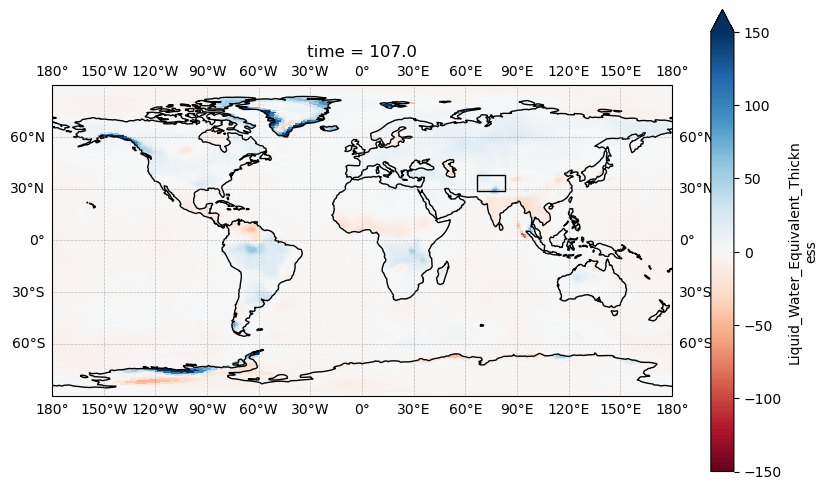

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0, globe=None)}, figsize=(10, 6))
# shp.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

im = temp.isel(time=0).plot(ax=ax, vmin=-150, vmax=150, cmap='RdBu', transform=ccrs.PlateCarree())
ax.coastlines(linewidth=1, edgecolor='black', facecolor='none')

# Set latitude and longitude ticks
# ax.set_xticks(np.arange(-180, 181, 10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-90, 91, 10), crs=ccrs.PlateCarree())

# Add latitude and longitude gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, 
             xlocs=np.arange(-180, 181, 30) ,ylocs=np.arange(-90, 91, 30), 
             color='gray', alpha=0.5, linestyle='--', crs=ccrs.PlateCarree())
import matplotlib.patches as patches

# Define the latitude and longitude ranges for the box
lat_range = [29, 38]
lon_range = [67, 83]

# Create a rectangle patch with the specified coordinates
rect = patches.Rectangle((lon_range[0], lat_range[0]), lon_range[1] - lon_range[0], lat_range[1] - lat_range[0],
                         linewidth=1, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree())

# Add the rectangle patch to the plot
ax.add_patch(rect)
ax.set_global()
plt.savefig('./arindan_indus/grace_data_box.png')
plt.show()

In [7]:
days_since_variable = temp['time']

<xarray.DataArray 'time' (time: 227)>
array([ 107. ,  129.5,  227.5, ..., 7928. , 7958.5, 7989. ], dtype=float32)
Coordinates:
  * time     (time) float32 107.0 129.5 227.5 ... 7.928e+03 7.958e+03 7.989e+03
Attributes:
    bounds:         time_bounds
    calendar:       gregorian
    axis:           T
    standard_name:  Time
    long_name:      Time
    Units:          days since 2002-01-01T00:00:00Z

In [8]:
reference_date = pd.to_datetime(temp.time.attrs['Units'].split(' ')[-1])

Timestamp('2002-01-01 00:00:00+0000', tz='UTC')

In [9]:
time_in_datetime = reference_date + pd.to_timedelta(days_since_variable, 'D')

DatetimeIndex(['2002-04-18 00:00:00+00:00', '2002-05-10 12:00:00+00:00',
               '2002-08-16 12:00:00+00:00', '2002-09-16 00:00:00+00:00',
               '2002-10-16 12:00:00+00:00', '2002-11-16 00:00:00+00:00',
               '2002-12-16 12:00:00+00:00', '2003-01-16 12:00:00+00:00',
               '2003-02-15 00:00:00+00:00', '2003-03-16 12:00:00+00:00',
               ...
               '2023-02-15 00:00:00+00:00', '2023-03-16 12:00:00+00:00',
               '2023-04-16 00:00:00+00:00', '2023-05-16 12:00:00+00:00',
               '2023-06-16 00:00:00+00:00', '2023-07-16 12:00:00+00:00',
               '2023-08-16 12:00:00+00:00', '2023-09-16 00:00:00+00:00',
               '2023-10-16 12:00:00+00:00', '2023-11-16 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=227, freq=None)

In [10]:
temp['time'] = time_in_datetime;
temp

<xarray.DataArray 'lwe_thickness' (time: 227, lat: 720, lon: 1440)>
[235353600 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * time     (time) object 1019088000000000000 ... 1700092800000000000
Attributes:
    grid_mapping:   WGS84
    standard_name:  Liquid_Water_Equivalent_Thickness
    long_name:      Liquid_Water_Equivalent_Thickness
    Units:          cm

In [11]:
# Area wighting
temp3 = np.multiply(temp,area_mat) 
temp.shape, area_mat.shape

((227, 720, 1440), (720, 1440))

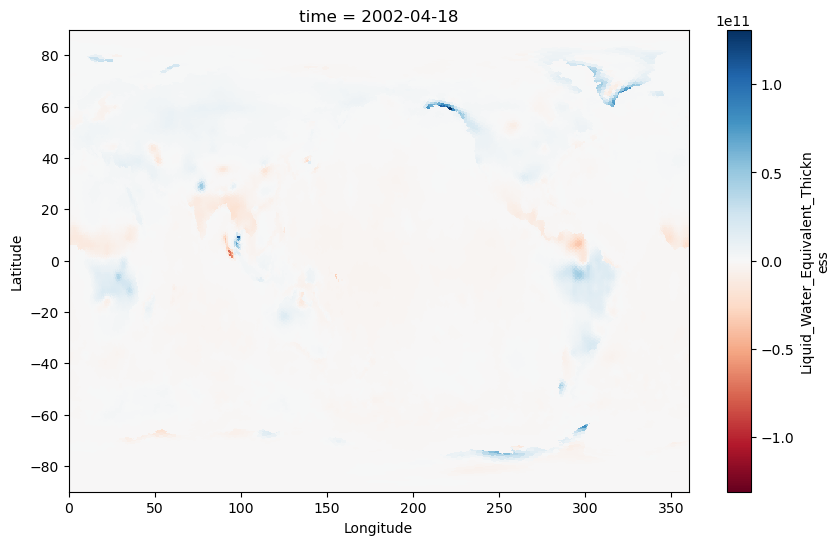

In [12]:
temp3.isel(time=0).plot(cmap='RdBu', figsize=(10, 6))

### `Basin avg`

In [13]:
import geopandas as gpd
import rioxarray
from shapely.geometry import mapping

<Axes: >

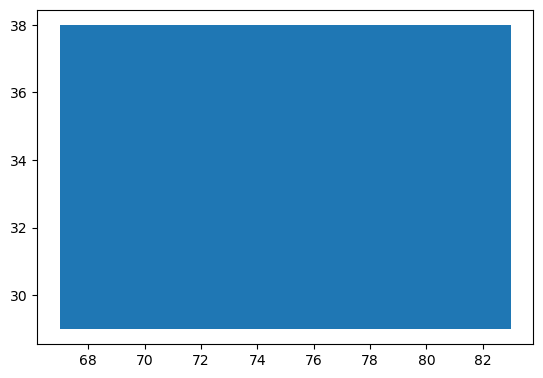

In [14]:
# import shapefile
# path='/home/caliber/research/shapefiles/mrb_shp_zip/mrb_basins.shp'
# path='/home/wslvivek/Desktop/level2/pysh_v2/validation/shapefiles/hybas_as_lev01-12_v1c/hybas_as_lev04_v1c.shp'
path = '/home/caliber/research/sharing_gr_data/arindan_indus/grace_data_box.gpkg'
shp = gpd.read_file(path)
shp.plot()

In [15]:
shp.values

array([[<POLYGON ((83 29, 67 29, 67 38, 83 38, 83 29))>]], dtype=object)

In [ ]:
basin_names = shp['RIVER_BASI'];

In [ ]:
# select ganga shapefile: HYBAS_ID = 4040960480
# shp_g=shp[shp['RIVER_BASI']=='AMAZON (also AMAZONAS)']  #  AMAZON (also AMAZONAS) GANGES
shp_g=shp[shp['RIVER_BASI']=='CAUVERY']  #  AMAZON (also AMAZONAS) GANGES  CAUVERY
print(shp_g)
shp_g.plot()
basin_area=np.float64(shp_g['SUM_SUB_AR'])*1e6

In [ ]:
shapefile = shp_g

# Create a map of India
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([70, 85, 5, 20], crs=ccrs.PlateCarree())

# Add the shapefile to the map
shapefile.plot(ax=ax, facecolor='none', edgecolor='red')

# Add latitude and longitude lines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--',
             xlocs=np.arange(70, 86, 5), ylocs=np.arange(5, 21, 5))

# Add physical geography features
ax.add_feature(cartopy.feature.RIVERS, facecolor='blue')
ax.add_feature(cartopy.feature.LAND, facecolor='lightgrey', edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN, facecolor='whitesmoke')
ax.add_feature(cartopy.feature.LAKES, facecolor='blue')

plt.savefig('/home/caliber/research/cauvery_roi.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [ ]:
ganges_mask=np.load('/home/caliber/research/shapefiles/ganges_mask_WGS84.npy');

In [ ]:
np.sum(ganges_mask*area)

In [ ]:
np.sum(ganges_mask*area) / basin_area

In [ ]:
avg_basin = np.ones(temp.shape[0])
for i in range(temp.shape[0]):
    temp2 = temp[i,:,:].values*area
    avg_basin[i] = np.sum(temp2) / (np.sum(ganges_mask*area) )

In [ ]:
plt.plot(avg_basin)

In [ ]:
# clip data using shapefile
''' add projection system to nc '''
basin_tws = temp3.rio.write_crs("EPSG:4326", inplace=True)
basin_tws = basin_tws.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
        
# mask data with shapefile
basin_tws = basin_tws.rio.clip(shp_g.geometry.apply(mapping), shp_g.crs,drop=True)

basin_tws_avg=basin_tws.sum(dim=('lon','lat'))/basin_area;
basin_tws

In [16]:
new_temp_spatial = temp.sel(lat=slice(lat_range[0], lat_range[1]), lon=slice(lon_range[0], lon_range[1]))
new_temp = temp3.sel(lat=slice(lat_range[0], lat_range[1]), lon=slice(lon_range[0], lon_range[1]));

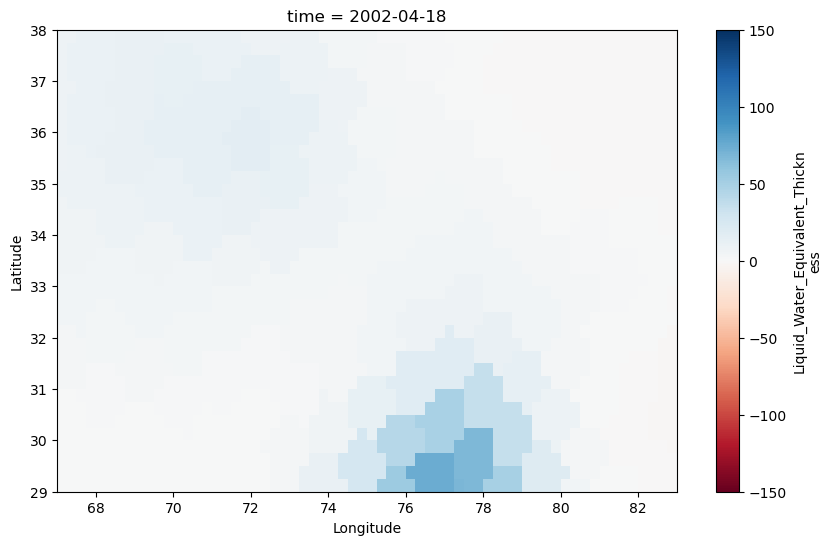

In [17]:
new_temp_spatial.isel(time=0).plot(vmin=-150, vmax=150, cmap='RdBu', figsize=(10, 6))
plt.savefig('./arindan_indus/grace_data_box_zoomed.png')

In [57]:
new_temp_spatial.to_netcdf('./arindan_indus/grace_data_box_zoomed.nc', engine='netcdf4')

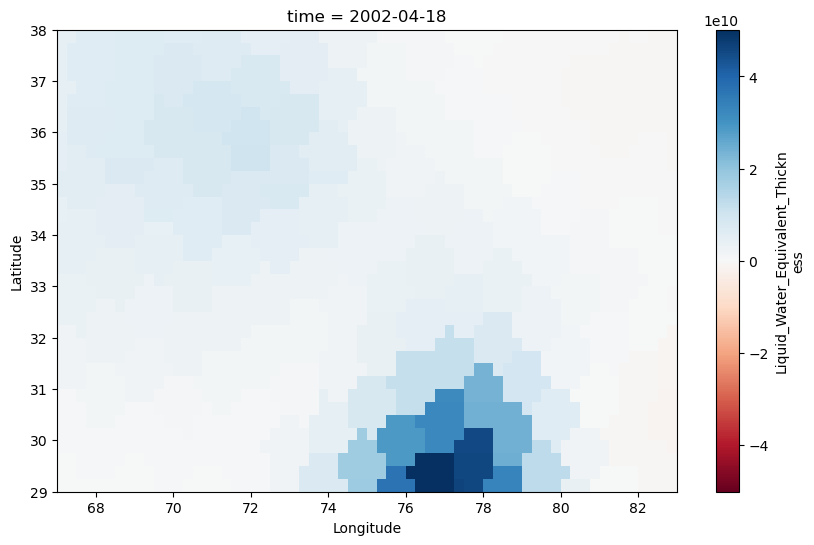

In [18]:
new_temp.isel(time=0).plot(cmap='RdBu', figsize=(10, 6))

In [19]:
from shapely.geometry import Polygon


In [20]:
shp_projected=shp.to_crs(epsg=24311, inplace=False)

,geometry
0,"POLYGON ((2468963.951 3378801.433, 889708.992 ..."


In [21]:
shape_area = np.float64(shp_projected.area[0])

1532054097024.949

In [22]:
new_temp_region_ts= new_temp.sum(dim=('lon','lat'))/shape_area

<xarray.DataArray 'lwe_thickness' (time: 227)>
array([ 7.20138932e+00,  6.43894495e+00,  1.95326596e+00,  2.64148093e+00,
        5.04074029e-01, -1.08893488e+00, -3.70062782e+00, -1.31907398e+00,
        2.44125866e+00,  7.41069790e+00,  7.07323194e+00,  9.34860790e+00,
        5.61261576e+00,  4.26088887e+00,  3.13222113e+00,  1.10416236e+00,
       -7.92251708e-01, -7.93095313e-01,  4.41614424e-01,  3.21604525e+00,
        9.10758114e-01,  1.57667833e+00,  1.70985134e+00, -1.07757201e+00,
       -3.41961938e-01, -1.39970020e+00, -1.75078653e+00, -3.08318644e+00,
       -3.39478179e+00, -4.46303399e+00, -1.53368286e+00,  4.44135306e+00,
        9.15829349e+00,  9.54764457e+00,  9.64495224e+00,  7.74116027e+00,
        7.18914941e+00,  4.03535492e+00,  2.70939954e+00,  8.83760968e-01,
       -4.35550585e-01, -2.80837790e+00, -5.55610296e-01,  2.25197081e+00,
        5.26801265e+00,  4.59286484e+00,  1.58266268e+00, -9.99537927e-02,
       -5.59967028e-02,  1.38997481e+00,  8.00216660e-01, -3.55137193e+00,
       -3.48676749e+00, -3.71279595e-01, -4.11840487e-01,  1.50598013e+00,
        7.09581068e+00,  5.85339400e+00,  3.54240900e+00,  2.69913112e+00,
        2.31192962e+00,  1.06286953e+00, -7.41245611e-01, -3.71967691e+00,
       -6.19275549e+00, -6.09975762e+00, -3.58193984e+00, -7.09165014e-01,
       -1.45823164e-01, -2.07353943e-02, -9.04486604e-01, -3.03739478e+00,
       -1.76312880e+00, -2.97855341e-01, -2.07972630e+00, -4.09928274e+00,
       -5.52573804e+00, -5.26854287e+00, -3.52313391e+00, -1.20152888e+00,
...
       -7.62417703e+00, -7.38312333e+00, -6.46975963e+00, -3.66577469e+00,
       -3.82838458e+00, -5.40380138e+00, -5.88710410e+00, -5.58016167e+00,
       -1.61729886e+01, -1.53845045e+01, -1.27239828e+01, -5.25071624e+00,
       -5.18766158e+00, -5.66564760e+00, -6.32570038e+00, -1.39531510e+01,
       -1.48004141e+01, -1.48769337e+01, -1.48100564e+01, -1.45302736e+01,
       -1.44732274e+01, -7.67657049e+00, -5.08348322e+00, -5.11332288e+00,
       -6.41000343e+00, -9.19081725e+00, -1.11700732e+01, -8.80946307e+00,
       -1.23532833e+01, -1.39218213e+01, -1.46244075e+01, -1.31728369e+01,
       -1.19893705e+01, -8.58707926e+00, -4.92609033e+00, -4.32048692e+00,
       -4.77210100e+00, -7.16505455e+00, -1.13915323e+01, -1.15510162e+01,
       -1.07264067e+01, -1.59122723e+01, -1.79476708e+01, -1.79338175e+01,
       -1.63355407e+01, -1.69850275e+01, -1.46266804e+01, -1.18247254e+01,
       -1.24099257e+01, -1.50879761e+01, -1.67205374e+01, -1.54596764e+01,
       -1.84845415e+01, -2.01733005e+01, -1.98969756e+01, -2.21347996e+01,
       -1.63496454e+01, -1.63295287e+01, -1.49869530e+01, -1.81232274e+01,
       -1.70972801e+01, -2.05884053e+01, -1.93102576e+01, -1.58944601e+01,
       -1.65028191e+01, -2.22655028e+01, -2.13011732e+01, -2.08508361e+01,
       -2.03184943e+01, -1.64120798e+01, -1.52256707e+01, -1.49699631e+01,
       -1.42090940e+01, -1.68119971e+01, -1.53106037e+01, -1.36957219e+01,
       -1.78803806e+01, -2.02486874e+01, -2.09578091e+01])
Coordinates:
  * time     (time) object 1019088000000000000 ... 1700092800000000000

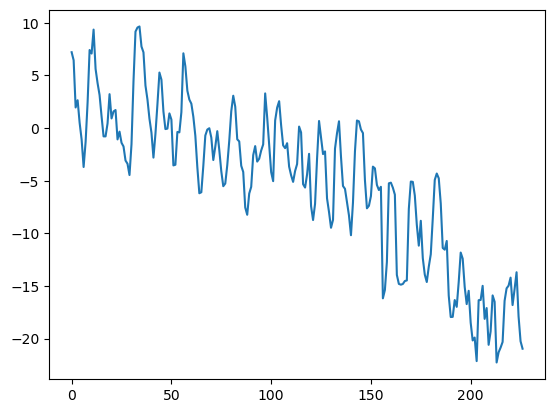

In [23]:
plt.plot(new_temp_region_ts.values)

In [25]:
basin_tws=new_temp_spatial
basin_tws_avg=new_temp_region_ts

<xarray.DataArray 'lwe_thickness' (time: 227)>
array([ 7.20138932e+00,  6.43894495e+00,  1.95326596e+00,  2.64148093e+00,
        5.04074029e-01, -1.08893488e+00, -3.70062782e+00, -1.31907398e+00,
        2.44125866e+00,  7.41069790e+00,  7.07323194e+00,  9.34860790e+00,
        5.61261576e+00,  4.26088887e+00,  3.13222113e+00,  1.10416236e+00,
       -7.92251708e-01, -7.93095313e-01,  4.41614424e-01,  3.21604525e+00,
        9.10758114e-01,  1.57667833e+00,  1.70985134e+00, -1.07757201e+00,
       -3.41961938e-01, -1.39970020e+00, -1.75078653e+00, -3.08318644e+00,
       -3.39478179e+00, -4.46303399e+00, -1.53368286e+00,  4.44135306e+00,
        9.15829349e+00,  9.54764457e+00,  9.64495224e+00,  7.74116027e+00,
        7.18914941e+00,  4.03535492e+00,  2.70939954e+00,  8.83760968e-01,
       -4.35550585e-01, -2.80837790e+00, -5.55610296e-01,  2.25197081e+00,
        5.26801265e+00,  4.59286484e+00,  1.58266268e+00, -9.99537927e-02,
       -5.59967028e-02,  1.38997481e+00,  8.00216660e-01, -3.55137193e+00,
       -3.48676749e+00, -3.71279595e-01, -4.11840487e-01,  1.50598013e+00,
        7.09581068e+00,  5.85339400e+00,  3.54240900e+00,  2.69913112e+00,
        2.31192962e+00,  1.06286953e+00, -7.41245611e-01, -3.71967691e+00,
       -6.19275549e+00, -6.09975762e+00, -3.58193984e+00, -7.09165014e-01,
       -1.45823164e-01, -2.07353943e-02, -9.04486604e-01, -3.03739478e+00,
       -1.76312880e+00, -2.97855341e-01, -2.07972630e+00, -4.09928274e+00,
       -5.52573804e+00, -5.26854287e+00, -3.52313391e+00, -1.20152888e+00,
...
       -7.62417703e+00, -7.38312333e+00, -6.46975963e+00, -3.66577469e+00,
       -3.82838458e+00, -5.40380138e+00, -5.88710410e+00, -5.58016167e+00,
       -1.61729886e+01, -1.53845045e+01, -1.27239828e+01, -5.25071624e+00,
       -5.18766158e+00, -5.66564760e+00, -6.32570038e+00, -1.39531510e+01,
       -1.48004141e+01, -1.48769337e+01, -1.48100564e+01, -1.45302736e+01,
       -1.44732274e+01, -7.67657049e+00, -5.08348322e+00, -5.11332288e+00,
       -6.41000343e+00, -9.19081725e+00, -1.11700732e+01, -8.80946307e+00,
       -1.23532833e+01, -1.39218213e+01, -1.46244075e+01, -1.31728369e+01,
       -1.19893705e+01, -8.58707926e+00, -4.92609033e+00, -4.32048692e+00,
       -4.77210100e+00, -7.16505455e+00, -1.13915323e+01, -1.15510162e+01,
       -1.07264067e+01, -1.59122723e+01, -1.79476708e+01, -1.79338175e+01,
       -1.63355407e+01, -1.69850275e+01, -1.46266804e+01, -1.18247254e+01,
       -1.24099257e+01, -1.50879761e+01, -1.67205374e+01, -1.54596764e+01,
       -1.84845415e+01, -2.01733005e+01, -1.98969756e+01, -2.21347996e+01,
       -1.63496454e+01, -1.63295287e+01, -1.49869530e+01, -1.81232274e+01,
       -1.70972801e+01, -2.05884053e+01, -1.93102576e+01, -1.58944601e+01,
       -1.65028191e+01, -2.22655028e+01, -2.13011732e+01, -2.08508361e+01,
       -2.03184943e+01, -1.64120798e+01, -1.52256707e+01, -1.49699631e+01,
       -1.42090940e+01, -1.68119971e+01, -1.53106037e+01, -1.36957219e+01,
       -1.78803806e+01, -2.02486874e+01, -2.09578091e+01])
Coordinates:
  * time     (time) object 1019088000000000000 ... 1700092800000000000

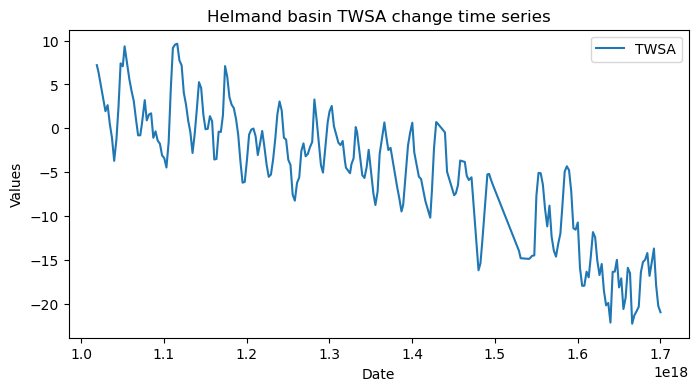

In [26]:
# %matplotlib widget
# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(basin_tws.time, basin_tws_avg.values, label='TWSA')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Helmand basin TWSA change time series')
plt.legend()
plt.show()

In [27]:
import calendar
new_data = {}

# Create years from 2002 to 2023
new_data['years'] = {}
for year in range(2002, 2024):
    new_data['years'][year] = {}

    # Create months within each year
    new_data['years'][year]['months'] = {}
    for month in range(1, 13):
        month_name = calendar.month_abbr[month]
        new_data['years'][year]['months'][month_name] = np.zeros_like(1) * np.nan; 

In [28]:
import pandas as pd
date_series = pd.to_datetime(basin_tws.time.values)

# Create a structure to store years and months
dates_structure = {}
dates_structure['years'] = {}

# Extract unique years from the DatetimeIndex
unique_years = date_series.year.unique()

index=0;
# For each year, extract unique months and store in the structure
for year in unique_years:
    year_months = date_series[date_series.year == year].month.unique()
    year_month_names = [];
    for month in year_months:
        month_name = calendar.month_abbr[month]
        year_month_names.append({month_name: basin_tws_avg[index]})
        # print(year_months)
        # print(month_name)
        index += 1
    dates_structure['years'][year] = {'months': year_month_names}

In [29]:
for key in dates_structure['years'].keys():
    # print(key)    
    for list_index, key2 in enumerate(dates_structure['years'][key]['months']):
        # print(key2.keys(), list_index)
        for key3 in key2.keys():
            # print(key3)
            new_data['years'][key]['months'][key3] = dates_structure['years'][key]['months'][list_index][key3];

In [30]:
(2023-2003+1)*12+12

264

In [31]:
stripped_new_data = np.zeros(264)*np.nan;  # 264
index2=0;
for key in new_data['years'].keys():
    # print(key)    
    for list_index, key2 in enumerate(new_data['years'][key]['months']):
        # print(key2, list_index) 
        stripped_new_data[index2] = new_data['years'][key]['months'][key2]
        index2 = index2 +1;
np.save('.stripped_new_data.npy', stripped_new_data)

In [32]:
# stripped_new_data = np.load('.stripped_new_data.npy');

In [33]:
# need a new date time series for the gapped data
new_dates = pd.date_range(start='2002-01-01', end='2024-01-01', freq='M')
new_dates

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31',
               ...
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', length=264, freq='M')

In [34]:
(2015-2003+1)*12+3+12

171

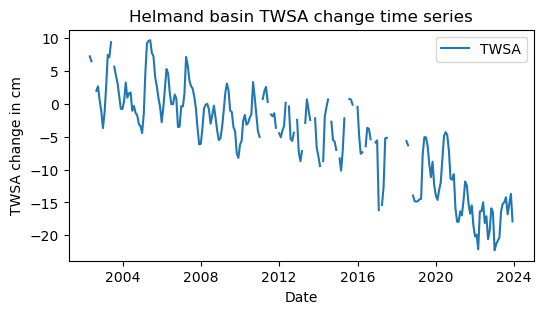

In [35]:
plt.figure(figsize=(6, 3))
plt.plot (new_dates, stripped_new_data, label='TWSA')
# plt.plot (new_dates[3:171], stripped_new_data[3:171], label='TWSA', ls='--')
plt.xlabel('Date')
plt.ylabel('TWSA change in cm')
plt.title('Helmand basin TWSA change time series')
plt.legend()
plt.show()

In [37]:
# Want to save here?
save_dataframe_gapped = pd.DataFrame({'time': new_dates, 'twsa-gapped': stripped_new_data})
save_dataframe_gapped.set_index('time', inplace=True)
save_dataframe_gapped

,twsa-gapped
time,
2002-01-31,NaN
2002-02-28,NaN
2002-03-31,NaN
2002-04-30,7.201389
2002-05-31,6.438945
...,...
2023-08-31,-16.811997
2023-09-30,-15.310604
2023-10-31,-13.695722


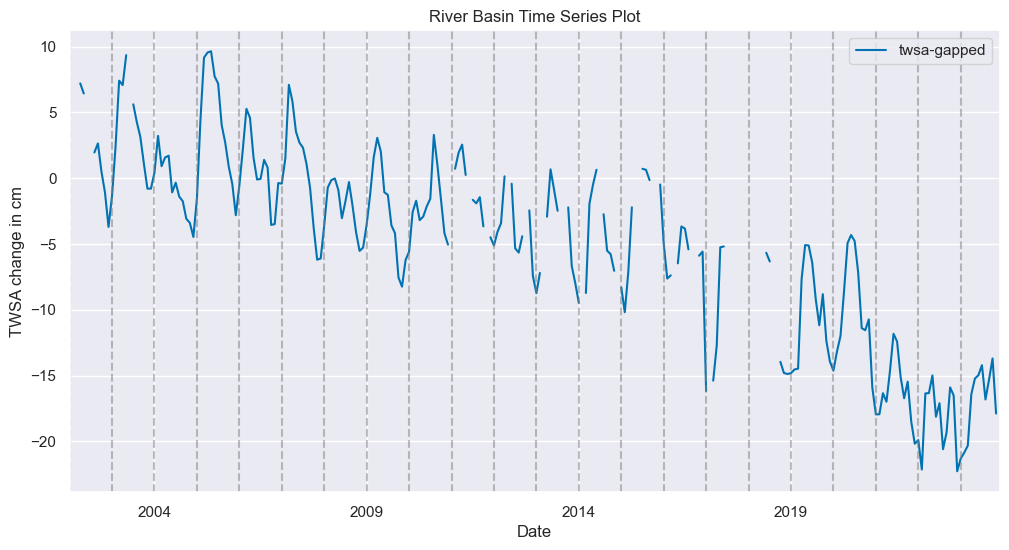

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the style and color palette
sns.set(style="darkgrid", palette="colorblind")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
save_dataframe_gapped.plot(ax=ax)

# Add vertical lines for each year
for year in range(2002, 2024):
    ax.axvline(pd.to_datetime(f"{year}-01-01"), color='gray', linestyle='--', alpha=0.5)

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('TWSA change in cm')

# Set the title
ax.set_title('River Basin Time Series Plot')

# Set the aspect ratio
ax.set_aspect('auto')

# Show the plot
plt.show()


In [40]:
save_dataframe_gapped.to_csv('./arindan_indus/grace_data_box_gapped.csv', sep='\t',index=True)

In [41]:
from scipy.interpolate import CubicSpline
cs_interp_data = stripped_new_data[3:171];
# Create an array of indices where NaN values occur
nan_indices = np.isnan(cs_interp_data)

# Create an array of indices where valid (non-NaN) values occur
valid_indices = ~nan_indices

# Generate x-values for both valid and NaN indices
x = np.arange(len(cs_interp_data))

# Interpolate missing values using cubic spline
interp = CubicSpline(x[valid_indices], cs_interp_data[valid_indices])

# Replace NaN values with interpolated values
cs_interp_data[nan_indices] = interp(x[nan_indices])
np.save('.cs_interp_data.npy', cs_interp_data)

In [42]:
cs_interp_data.shape

(168,)

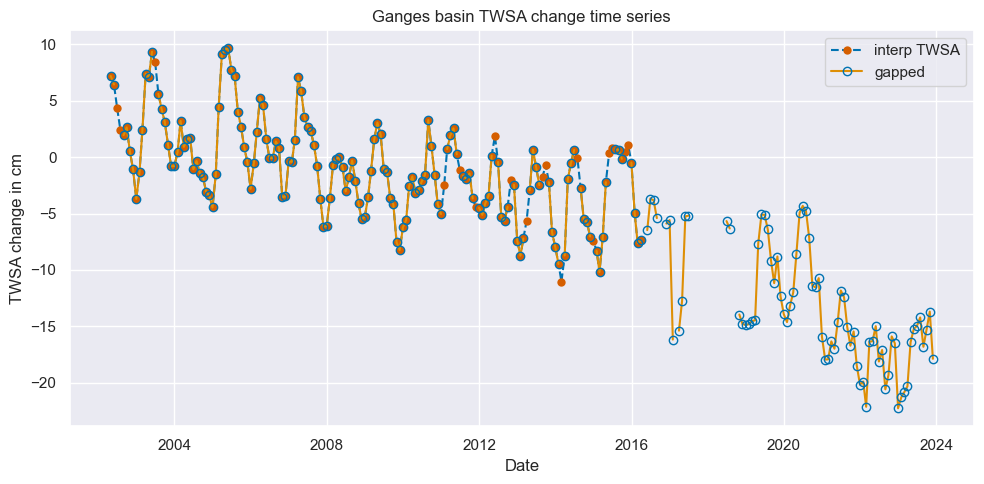

In [43]:
sasa = np.load('.stripped_new_data.npy');
# cs_interp_data = np.load('.cs_interp_data.npy');
plt.figure(figsize=(10, 5))
# plt.bar (new_dates[0:a], sasa[0:a], label='TWSA')
# plt.plot(basin_tws.time, basin_tws.values, label='org', color='r', marker='o')
plt.plot (new_dates[3:171], cs_interp_data, label='interp TWSA', linestyle='--', marker='o',markerfacecolor="r",
         markeredgecolor='None')
plt.plot (new_dates, sasa, label='gapped', marker='o', markerfacecolor="None",markeredgecolor='b')
plt.xlabel('Date')
plt.ylabel('TWSA change in cm')
plt.title('Ganges basin TWSA change time series')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
'16/03/2016'
9+(2015-2003+1)*12+3 ,cs_interp_data.shape

In [ ]:
np.save('/sftorage/wp1/extracted_variables/primary_data/2002_04_2016_03_cubicinterp_csr_ts.npy', cs_interp_data)

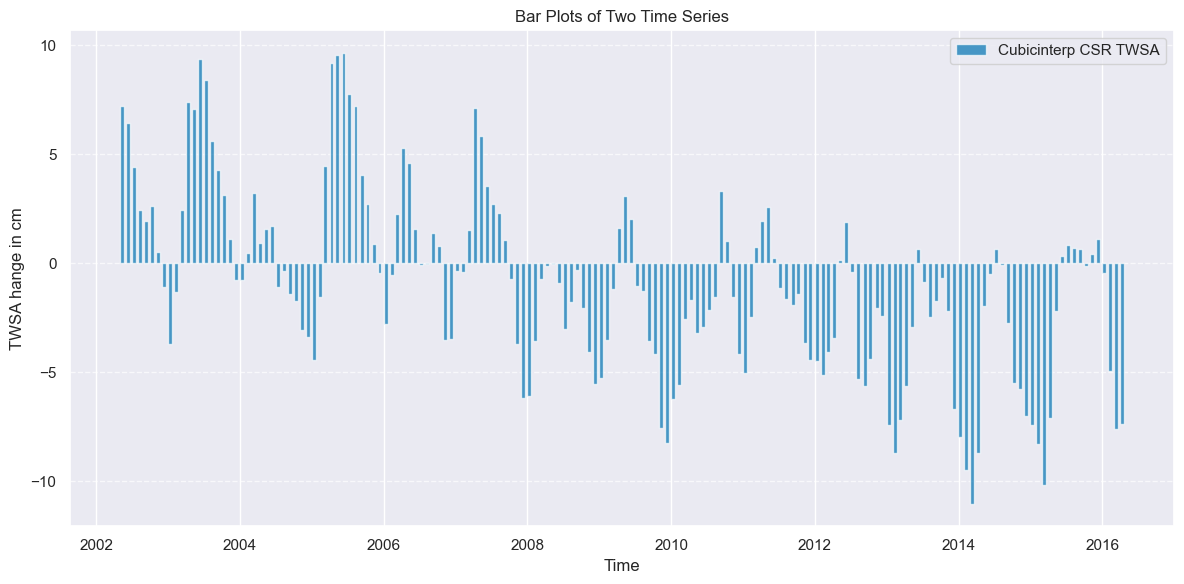

In [44]:
# Create a DataFrame with the data
# df1 = pd.DataFrame({'Date': new_dates, 'CSR TWSA': sasa})
df2 = pd.DataFrame({'Date': new_dates[3:171], 'interp CSR TWSA': cs_interp_data[0:168]})

# Set the Date column as the index
# df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)


# Plot the two time series data as bar plots
plt.figure(figsize=(12, 6))
# plt.bar(df1.index, df1['CSR TWSA'], width=20, label='CSR TWSA', align='center', alpha=0.7)
plt.bar(df2.index, df2['interp CSR TWSA'], width=20, label='Cubicinterp CSR TWSA', align='edge', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('TWSA hange in cm')
plt.title('Bar Plots of Two Time Series')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
# df1.to_csv('./data/csr_ts.csv', sep=',', index=True)
df2.to_csv('./arindan_indus/grace_data_box_2002_04_2016_03_cubicinterp.csv', sep=',', index=True)

In [47]:
save_dataframe_gapped

,twsa-gapped
time,
2002-01-31,NaN
2002-02-28,NaN
2002-03-31,NaN
2002-04-30,7.201389
2002-05-31,6.438945
...,...
2023-08-31,-16.811997
2023-09-30,-15.310604
2023-10-31,-13.695722


In [52]:
cs_interp_data.shape

(168,)

In [53]:
save_dataframe_gapped['twsa-interp'] = np.nan
save_dataframe_gapped['twsa-interp'][3:171] = cs_interp_data
save_dataframe_gapped

,twsa-gapped,twsa-interp
time,,
2002-01-31,NaN,NaN
2002-02-28,NaN,NaN
2002-03-31,NaN,NaN
2002-04-30,7.201389,7.201389
2002-05-31,6.438945,6.438945
...,...,...
2023-08-31,-16.811997,NaN
2023-09-30,-15.310604,NaN
2023-10-31,-13.695722,NaN


<Axes: xlabel='time'>

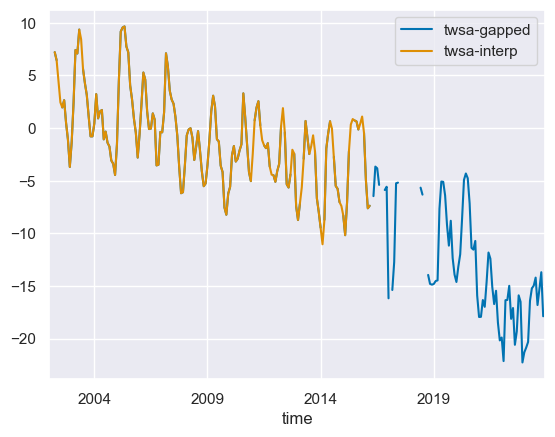

In [54]:
save_dataframe_gapped.plot()

In [56]:
save_dataframe_gapped.to_csv('./arindan_indus/grace_data_box_gapped_&_interp_2016_03.csv', sep='\t',index=True)

# We also require the mask, I use region mask to generate a mask as a matrix with 1 and 0 inside and outside the basin area respectively

In [ ]:
from Clip_with_shapefile import clipping_tools

I need to save the Helmand basin as a separate basin file now

In [ ]:
shp_hel.to_file('./shp_hel')

In [ ]:
# read back the saved file again
temp_shp_hel = gpd.read_file('./shp_hel/shp_hel.shp')
print(temp_shp_hel.head())
temp_shp_hel.plot()

Eerything looks alright 
Now lets make a mask

In [ ]:
mask, temp  = clipping_tools(temp, './shp_hel/shp_hel.shp', 'rgmask')

In [ ]:
mask2 = np.where(np.isnan(mask), 0,1)    # replacing NaN values with 0's
mask2

In [ ]:
import scipy
scipy.io.savemat('./mask2.mat', {'mask2': np.flipud(mask2)})  # using np.flipud to bring it to WGS84 projection